In [1]:
#importing necessory libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset to python enviornment
data = pd.read_csv('Add_sales_data_2018.csv')
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
# checking basic statistics
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [4]:
#checking for null values
data.isna().any()

Date                    False
Add1(in Thousands)      False
Add2(in Thousands)      False
Add3(in Thousands)      False
Add4(in Thousands)      False
Add5(in Thousands)      False
Profit(in Thousands)    False
dtype: bool

# 1. check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

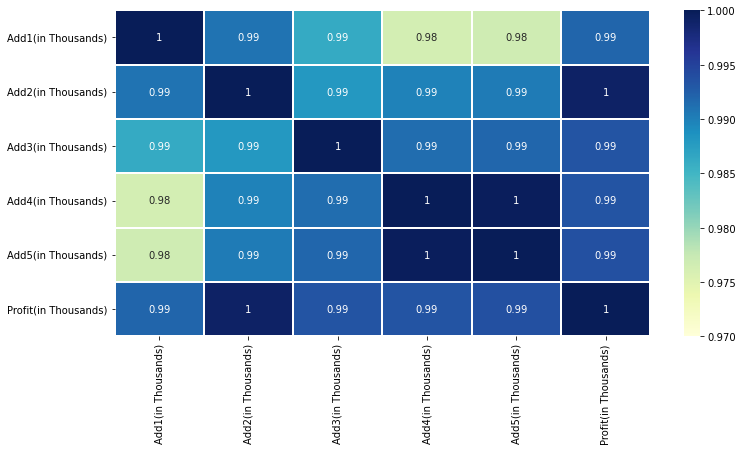

In [5]:
#plotting correlation matrix 
plt.subplots(figsize=(12,6))
sns.heatmap(data.corr(),vmin=0.97,vmax=1,annot=True,linewidth=0.2,cmap='YlGnBu')
plt.show()

Insights:
    As from the correlation matrix there exist a high positive correlation between amount spent in ads and the profit enerated

# Build a regression model to predict the profit from the given data and comment your findings on it.

In [6]:
# getting data ready for fitting in model
#dependent variable is stored in y
y=data['Profit(in Thousands)']
#independent variable is stored in x
X=data.drop(['Date', 'Profit(in Thousands)'],axis=1)

In [7]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

1. Linear Regression Model

In [11]:
from sklearn import linear_model
#creating instance of linear regression model
lr = linear_model.LinearRegression()

#fitting data to model
model1 = lr.fit(X_train,y_train)

#making prediction
prediction = model1.predict(X_test)

In [12]:
# validating model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE = mean_squared_error(prediction,y_test)
print('Mean of squared errors of the linear regression model is ',MSE)
r2 = r2_score(predictions1,y_test)
print('R2 value of the linear regression model is ',r2)

Mean of squared errors of the linear regression model is  8.11273293080854e-25
R2 value of the linear regression model is  1.0


2. Lasso Model

In [14]:
# creating model
las = linear_model.Lasso(alpha=1)
#fitting the model
model = las.fit(X_train,y_train)
#predicting
prediction = model.predict(X_test)

In [15]:
# validating model
MSE = mean_squared_error(prediction,y_test)
print('Mean of squared errors of the lasso model is ',MSE)
r2 = r2_score(predictions1,y_test)
print('R2 value of the linear regression model is ',r2)

Mean of squared errors of the lasso model is  0.5840411707385855
R2 value of the linear regression model is  1.0


Insights :
    Linear regression model performed better than lasso model for the given data set. 

# Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
Add1(in Thousands) 290
Add2(in Thousands) 312
Add3(in Thousands) 309
Add4(in Thousands) 298

In [16]:
# we can use regression model for better result
model1.predict(np.array([[290, 312,309,298,320]]))

array([5820.06])

the predicted profit for given data is 5820.06